In [865]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import contextlib
import io
# Developed Library
from Database import COMP_DB, check_sanity
from Flash import Stream, UOP, Q_Flash, PENG_ROBINSON
# from Utility 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [866]:
print(COMP_DB)

{'critical':              omega          bp            pc          tc       vc          mw
component                                                                    
benzene    0.21500  353.229014  4.924389e+06  562.088022  0.25999   78.110001
toluene    0.25960  383.789011  4.100039e+06  591.789011  0.31600   92.140800
o-xylene   0.30230  417.565012  3.732809e+06  630.362009  0.36912  106.166000
m-xylene   0.32600  412.255015  3.541119e+06  617.039011  0.37573  106.166000
p-xylene   0.32589  411.500010  3.510789e+06  616.250010  0.37906  106.166000
...            ...         ...           ...         ...      ...         ...
n-c15      0.70599  543.758005  1.516810e+06  706.990000  0.87998  212.410004
n-c14      0.67900  526.648020  1.620180e+06  693.990000  0.82999  198.380005
n-c13      0.62300  508.569010  1.723530e+06  675.789011  0.77999  184.367004
n-c12      0.56199  489.418009  1.829920e+06  658.289011  0.71297  170.339005
n-c11      0.53500  469.030009  1.964930e+06  638.2

In [867]:

# Component in Scope for the calculation
comp1= {'benzene': 0.2,
      'toluene': 0.3,
      'o-xylene': 0.5}
comp2= {'n-butane': 0.15,
      'n-pentane': 0.25,
      'n-hexane': 0.35,
      'n-c15':0.25}
# check for consistency of the component list
check_sanity(comp1)
check_sanity(comp2)
    


Sanity check completed successfully.
Sanity check completed successfully.


In [868]:
# create a stream from the component list
s1 = Stream(name="s1", composition=comp1, temperature=300, pressure=2e5, flowrate=100)
s2 = Stream(name="s2",composition=comp2, temperature=400, pressure=1e5, flowrate=100)

### Adiabatic Flash

In [869]:
# Wrap the streams with EOS solver
s1 = PENG_ROBINSON(s1)
s2 = PENG_ROBINSON(s2)

##### Parameters Calculation:
Temperature: 300, Pressure: 200000.0
Tr: [0.53372424 0.50693743 0.47591701], alpha: [1.40878072 1.48344536 1.57033423], a: [2.85669553 4.00480703 5.28324332], b: [7.38314817e-05 9.33616470e-05 1.09230481e-04]
#####
Single phase: Liquid
Single phase: Liquid
A: 0.14005157029738585, B: 0.007809320084569303, a_mix: 4.356327650774311, b_mix: 9.739003077466377e-05
Z roots: [0.84692212 0.13632822 0.00894034]
##### Z-factor Calculation:
Z_l: 0.008940337003033441, Z_v: 0.846922124645534
#####
##### Fugacity Coefficient Calculation:
Z: 0.008940337003033441, x_or_y: [0.2, 0.3, 0.5], A: 0.14005157029738585, B: 0.007809320084569303, a_mix: 4.356327650774311, b_mix: 9.739003077466377e-05
ln_phi: [-2.60143144 -3.79220882 -5.17581606]
phi: [0.07416734 0.02254575 0.0056516 ]
#####
A: 0.14005157029738585, B: 0.007809320084569303, a_mix: 4.356327650774311, b_mix: 9.739003077466377e-05
Z roots: [0.84692212 0.13632822 0.00894034]
##### Z-factor Calculation:
Z_l: 0.008940337003

In [870]:
# get the simple flash result
s1.basic_info()

### Post Flash Results for Stream:s1 ###
T:, 300 K, P: 200000.0 Pa, F: 100 mol/hr
Z_l: 0.0089, Z_v: 0.8469, phi_l: [0.07 0.02 0.01], phi_v: [0.92 0.88 0.84]
K: [0.0805 0.0256 0.0067]
VF: 0, xi: [0.2 0.3 0.5], yi: [0. 0. 0.]
h_l: 26076.1 J/mol, h_v: 0 J/mol, h: 26076.1 J/mol
###


### TXY Plot

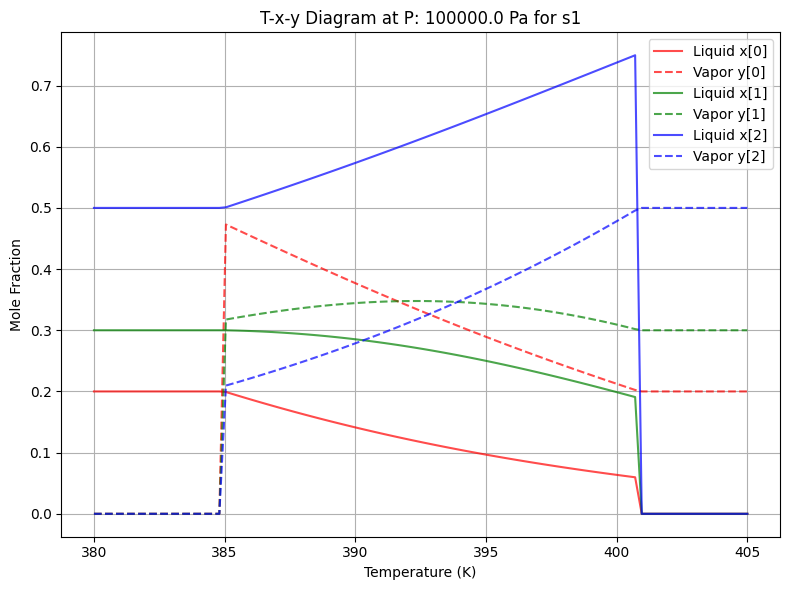

In [871]:
from Utility import plot_TXY
# TXY plot for s2
with contextlib.redirect_stdout(io.StringIO()):
    plot_TXY(s1, P=1e5, T_min=380, T_max=405, T_step=100)


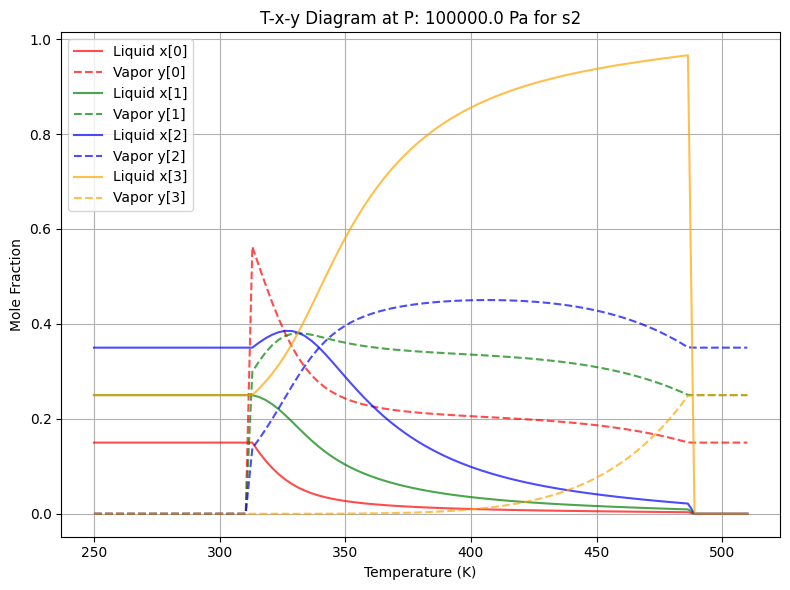

In [872]:
from Utility import plot_TXY
# TXY plot for s2

with contextlib.redirect_stdout(io.StringIO()):
    plot_TXY(s2, P=1e5, T_min=250, T_max=510, T_step=100)

### PXY Plot

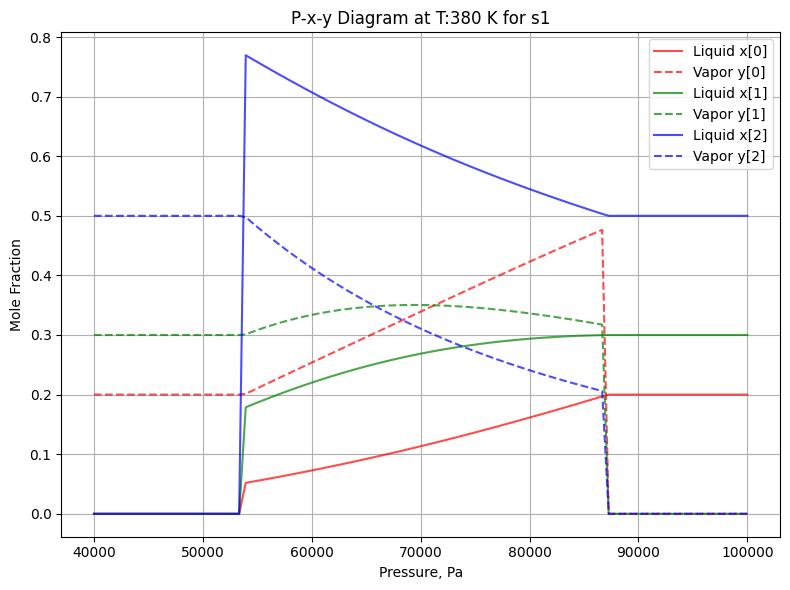

In [873]:
from Utility import plot_PXY
# PXY plot for s1
with contextlib.redirect_stdout(io.StringIO()):
    plot_PXY(s1, T=380, P_min=0.4e5, P_max=1e5, P_step=100)


### Why need np.roots() and why not fsolve

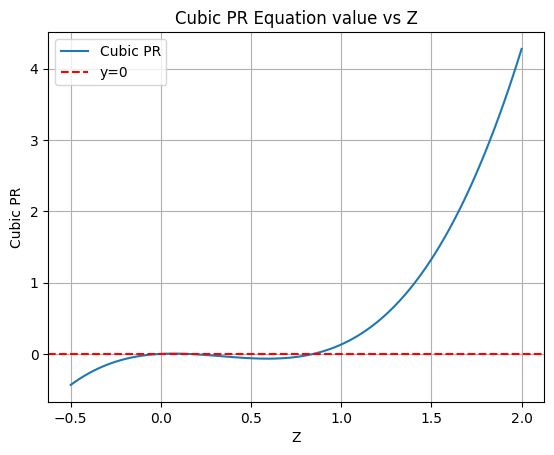

In [874]:
s1.solver.plot_cubic_PR(s1.A, s1.B)

## Non-Adiabatic Flash

##### Parameters Calculation:
Temperature: 350.0, Pressure: 200000.0
Tr: [0.62267827 0.591427   0.55523651], alpha: [1.3140309  1.38013858 1.45929967], a: [2.66456386 3.72591323 4.9096779 ], b: [7.38314817e-05 9.33616470e-05 1.09230481e-04]
#####
Single phase: Liquid
A: 0.09570859271272295, B: 0.00669370292963083, a_mix: 4.052071162533681, b_mix: 9.739003077466377e-05
Z roots: [0.90302376 0.08226592 0.00801662]
##### Z-factor Calculation:
Z_l: 0.008016620441613371, Z_v: 0.9030237610231858
#####
##### Fugacity Coefficient Calculation:
Z: 0.008016620441613371, x_or_y: [0.2, 0.3, 0.5], A: 0.09570859271272295, B: 0.00669370292963083, a_mix: 4.052071162533681, b_mix: 9.739003077466377e-05
ln_phi: [-0.7863932  -1.73298949 -2.82558101]
phi: [0.45548468 0.17675521 0.05927421]
#####
A: 0.09570859271272295, B: 0.00669370292963083, a_mix: 4.052071162533681, b_mix: 9.739003077466377e-05
Z roots: [0.90302376 0.08226592 0.00801662]
##### Z-factor Calculation:
Z_l: 0.008016620441613371, Z_v: 0.903023

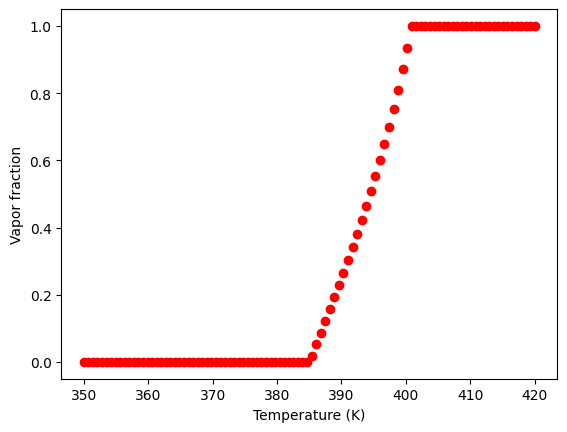

In [875]:
import matplotlib.pyplot as plt
for t in np.linspace(350,420,100):
    s1.T = t
    s1.P = 1e5
    plt.xlabel('Temperature (K)')
    plt.ylabel('Vapor fraction')
    plt.plot( t, s1.vf,'ro')


In [876]:
from UnitOperation import Heater
with contextlib.redirect_stdout(io.StringIO()):
    # Give some duty to the stream
    s1.T, s1.P, s1.flowrate = 300, 2e5, 100
    h1 = Heater(s1, dP=0.1e5, dT=10)
h1.basic_info()


### Heater Unit Operation ###
Feed Stream: s1
Outlet Stream: s1
Heat Duty: 204.65 kJ/h
Pressure Drop: -10000.0 Pa
Temperature Change: 10 K
#############################


In [877]:
# product Stream of s1
h1.ps.basic_info()

### Post Flash Results for Stream:s1 ###
T:, 310 K, P: 190000.0 Pa, F: 100 mol/hr
Z_l: 0.0083, Z_v: 0.8694, phi_l: [0.12 0.04 0.01], phi_v: [0.93 0.89 0.86]
K: [0.1274 0.0426 0.0119]
VF: 0, xi: [0.2 0.3 0.5], yi: [0. 0. 0.]
h_l: 28122.65 J/mol, h_v: 0 J/mol, h: 28122.65 J/mol
###


In [878]:
# Let say we want to increast the temperature and want to know the duty required
# and ofcourse the new stream phase composition and vapor fraction
with contextlib.redirect_stdout(io.StringIO()):
    h2 = Heater(h1.ps, dP=0.7e5, dT=20)
    
h2.basic_info()

### Heater Unit Operation ###
Feed Stream: s1
Outlet Stream: s1
Heat Duty: 445.77 kJ/h
Pressure Drop: -70000.0 Pa
Temperature Change: 20 K
#############################


## Validation with HYSYS Result

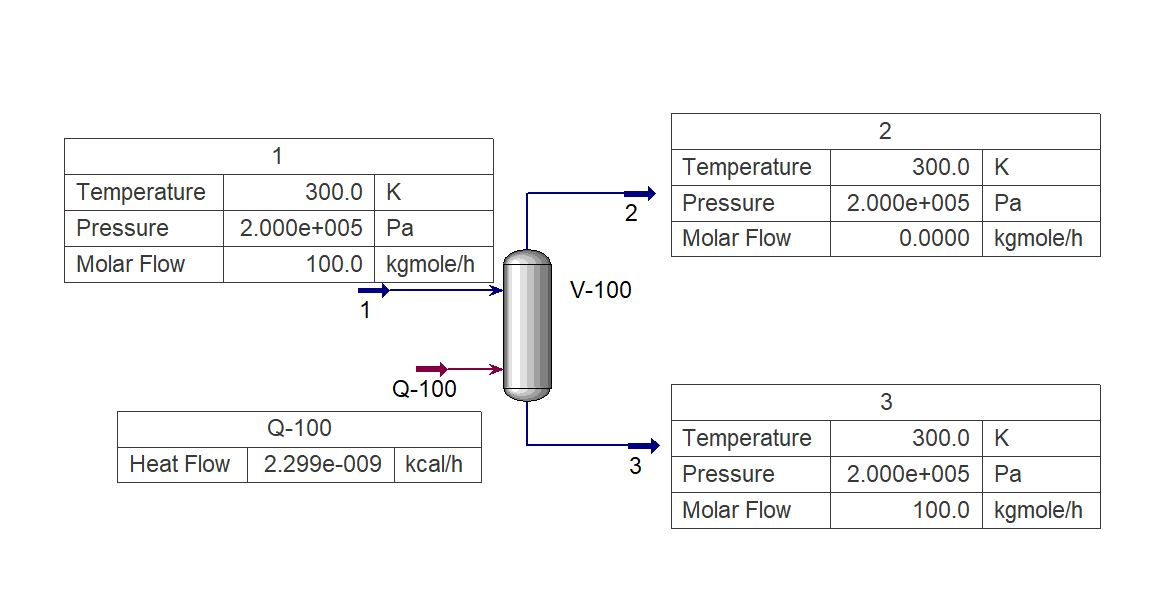

In [879]:
from IPython.display import Image
Image(filename='Capture.jpg') 

In [880]:



# load HYSYS run Data from excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

hysys_data = pd.read_excel('HYSYSResult.xlsx', sheet_name='Selected')
hysys_data.tail()

,"dP, Pa","dT, K",K1,K2,K3,beta,x1,x2,x3,Z_v,Z_l,"Q, kJ/hr"
120,147099.75,70,3.058624,1.285192,0.473883,0.3396,0.1177,0.2735,0.6088,0.9816,0.002107,2333694.0
121,147099.75,72,3.224775,1.363707,0.507009,0.4487,0.1001,0.2579,0.6420,0.9814,0.002114,2750022.0
122,147099.75,74,3.394333,1.445884,0.542160,0.5687,0.0847,0.2393,0.6760,0.9812,0.002121,3210658.0
123,147099.75,76,3.575246,1.532081,0.579007,0.7042,0.0711,0.2182,0.7107,0.9810,0.002128,3731486.0
124,147099.75,78,3.758446,1.622120,0.617975,0.8621,0.0592,0.1953,0.7455,0.9808,0.002135,4338840.0


In [881]:
# run Heater against s1 stream for different cases and keep data record

# Ensure the required columns exist in the DataFrame
if not {'c_K1', 'c_K2', 'c_K3', 'c_beta', 'c_x1', 'c_x2', 'c_x3', 'c_Z_l', 'c_Z_v'}.issubset(hysys_data.columns):
    hysys_data[['c_K1', 'c_K2', 'c_K3', 'c_beta', 'c_x1', 'c_x2', 'c_x3', 'c_Z_l', 'c_Z_v']] = np.nan


with contextlib.redirect_stdout(io.StringIO()):
    s1.composition = {'benzene': 0.2, 'toluene': 0.3, 'o-xylene': 0.5}
    s1.T, s1.P, s1.flowrate = 300, 2e5, 100

    for i in hysys_data.index:
        dP = hysys_data['dP, Pa'].iloc[i]
        dT = hysys_data['dT, K'].iloc[i]
        s1.T, s1.P, s1.flowrate = 300, 2e5, 100
        h1 = Heater(s1, dP=dP, dT=dT)

        hysys_data.loc[i, ['c_K1', 'c_K2', 'c_K3']] = h1.ps.K[0], h1.ps.K[1], h1.ps.K[2]
        hysys_data.loc[i, 'c_beta'] = h1.ps.vf
        hysys_data.loc[i, ['c_x1', 'c_x2', 'c_x3']] = h1.ps.x_i[0], h1.ps.x_i[1], h1.ps.x_i[2]
        hysys_data.loc[i, ['c_Z_l', 'c_Z_v']] = h1.ps.Z_l, h1.ps.Z_v
        hysys_data.loc[i, 'c_Q'] = h1.dH

pd.set_option('display.max_columns', None) 
hysys_data.tail().round(4)

,"dP, Pa","dT, K",K1,K2,K3,beta,x1,x2,x3,Z_v,Z_l,"Q, kJ/hr",c_K1,c_K2,c_K3,c_beta,c_x1,c_x2,c_x3,c_Z_l,c_Z_v,c_Q
120,147099.75,70,3.0586,1.2852,0.4739,0.3396,0.1177,0.2735,0.6088,0.9816,0.0021,2333694.0,3.0594,1.2854,0.4742,0.3403,0.1176,0.2734,0.6090,0.0021,0.9816,1.804316e+06
121,147099.75,72,3.2248,1.3637,0.5070,0.4487,0.1001,0.2579,0.6420,0.9814,0.0021,2750022.0,3.2252,1.3641,0.5073,0.4494,0.1000,0.2578,0.6422,0.0021,0.9814,1.896439e+06
122,147099.75,74,3.3943,1.4459,0.5422,0.5687,0.0847,0.2393,0.6760,0.9812,0.0021,3210658.0,3.3974,1.4464,0.5423,0.5695,0.0846,0.2392,0.6763,0.0021,0.9812,1.992842e+06
123,147099.75,76,3.5752,1.5321,0.5790,0.7042,0.0711,0.2182,0.7107,0.9810,0.0021,3731486.0,3.5762,1.5326,0.5793,0.7051,0.0710,0.2181,0.7109,0.0021,0.9810,2.094969e+06
124,147099.75,78,3.7584,1.6221,0.6180,0.8621,0.0592,0.1953,0.7455,0.9808,0.0021,4338840.0,3.7617,1.6227,0.6182,0.8632,0.0591,0.1951,0.7458,0.0021,0.9808,2.205027e+06


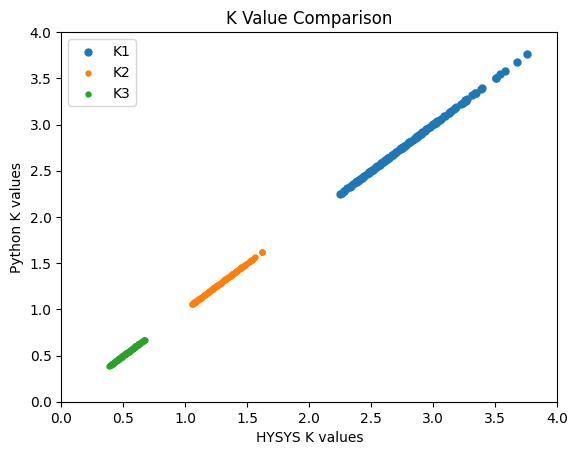

In [882]:
# plot for K values
plt.scatter(hysys_data['K1'], hysys_data['c_K1'], label='K1', marker='.', s=100)
plt.scatter(hysys_data['K2'], hysys_data['c_K2'], label='K2', marker='.', s=50)
plt.scatter(hysys_data['K3'], hysys_data['c_K3'], label='K3', marker='.', s=50)

plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('HYSYS K values')
plt.ylabel('Python K values')
plt.title('K Value Comparison')
plt.legend()
plt.show()

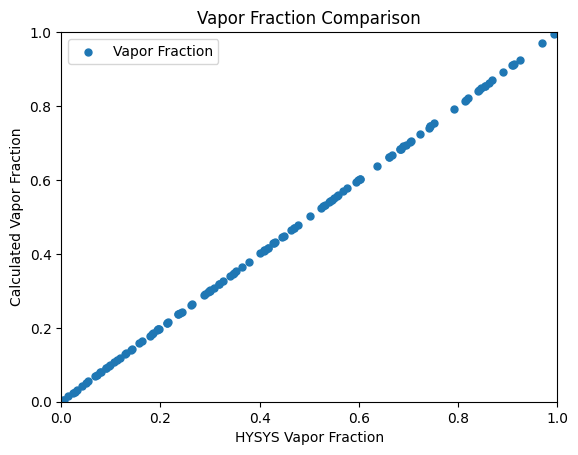

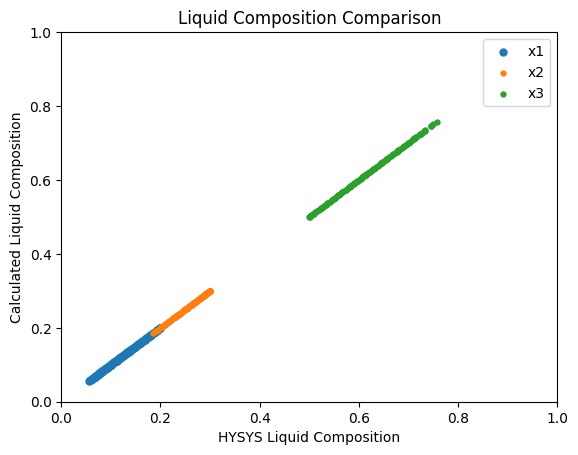

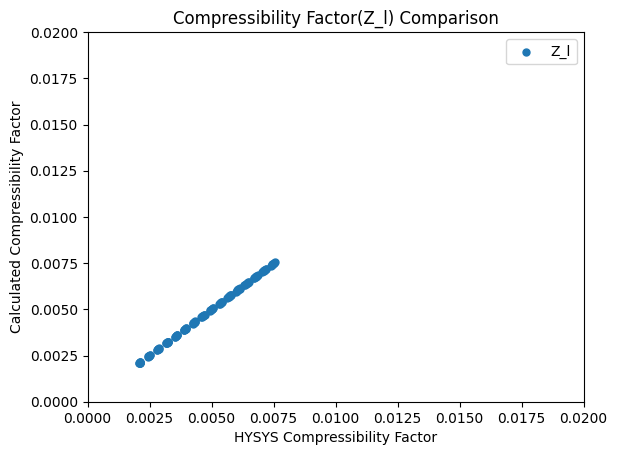

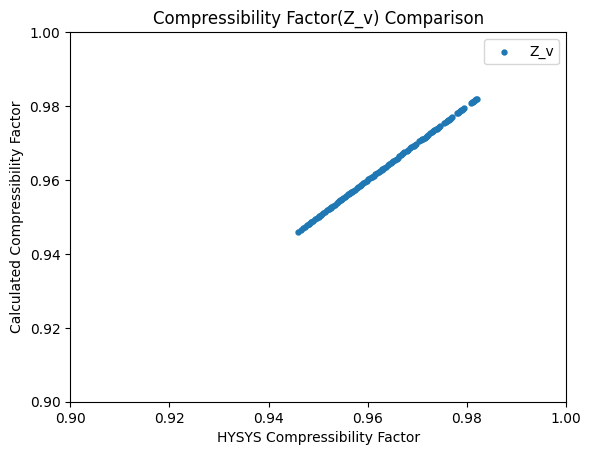

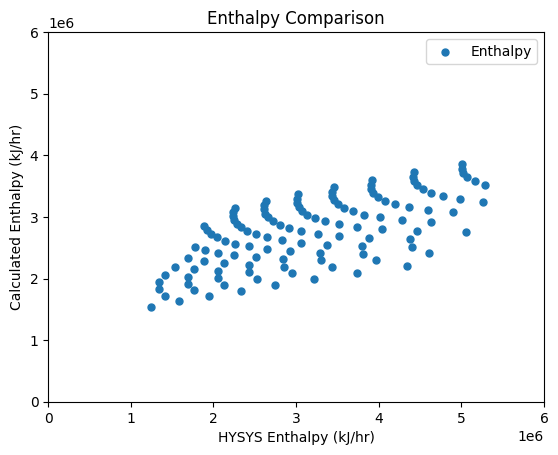

In [892]:
# plot for vapor fraction
plt.scatter(hysys_data['beta'], hysys_data['c_beta'], label='Vapor Fraction', marker='.', s=100)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('HYSYS Vapor Fraction')
plt.ylabel('Calculated Vapor Fraction')
plt.title('Vapor Fraction Comparison')
plt.legend()
plt.show()
# plot for liquid composition
plt.scatter(hysys_data['x1'], hysys_data['c_x1'], label='x1', marker='.', s=100)
plt.scatter(hysys_data['x2'], hysys_data['c_x2'], label='x2', marker='.', s=50)
plt.scatter(hysys_data['x3'], hysys_data['c_x3'], label='x3', marker='.', s=50)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('HYSYS Liquid Composition')
plt.ylabel('Calculated Liquid Composition')
plt.title('Liquid Composition Comparison')
plt.legend()
plt.show()
# plot for compressibility factor
plt.scatter(hysys_data['Z_l'], hysys_data['c_Z_l'], label='Z_l', marker='.', s=100)
plt.xlim(0, 0.02)
plt.ylim(0, 0.02)
plt.xlabel('HYSYS Compressibility Factor')
plt.ylabel('Calculated Compressibility Factor')
plt.title('Compressibility Factor(Z_l) Comparison')
plt.legend()
plt.show()
# plot for compressibility factor
plt.scatter(hysys_data['Z_v'], hysys_data['c_Z_v'], label='Z_v', marker='.', s=50)
plt.xlim(0.9, 1)
plt.ylim(0.9, 1)
plt.xlabel('HYSYS Compressibility Factor')
plt.ylabel('Calculated Compressibility Factor')
plt.title('Compressibility Factor(Z_v) Comparison')
plt.legend()
plt.show()
# plot for Duty comparison
plt.scatter(hysys_data['Q, kJ/hr'], hysys_data['c_Q'], label='Enthalpy', marker='.', s=100)
plt.xlim(0, 0.6e7)    
plt.ylim(0, 0.6e7)
plt.xlabel('HYSYS Enthalpy (kJ/hr)')
plt.ylabel('Calculated Enthalpy (kJ/hr)')
plt.title('Enthalpy Comparison')
plt.legend()
plt.show()


In [884]:
# Enthalpyerror % plot
